## 🧾 Zomato Bengaluru Data Analysis

📍 Objective:
To perform Exploratory Data Analysis (EDA) on the Zomato Bengaluru dataset to understand restaurant trends, ratings, cuisines, and customer preferences.

# Tools & Libraries Used:

Python

Pandas (for data manipulation)

NumPy (for numerical operations)

Matplotlib & Seaborn (for data visualization)

# Steps Covered:

Data Understanding

Data Cleaning

Exploratory Data Analysis (EDA)

Insights & Conclusions

##  Business Questions :
1. What types of restaurants dominate the Bengaluru market?
2. Which areas have the highest-rated and most popular restaurants?
3. How does the cost for two vary across cuisines and restaurant types?
4. Do online ordering and table booking impact customer ratings?
5. Which cuisines perform best in online delivery?
6. Are higher-priced restaurants associated with better customer satisfaction?
7. Which localities present opportunities for new restaurant openings?

In [53]:
### Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Dataset

In [2]:
df = pd.read_excel("zomatoo.xlsx")

### Step 3: Basic Exploration

In [3]:
df.shape            # rows and columns
df.info()           # data types and nulls
df.head()           # first 5 rows
df.tail()           # last 5 rows
df.columns          # list of columns
df.describe()       # summary of numeric columns
df.nunique()        # Returns the number of unique values in each column of the DataFrame
print(df.index)     # Prints the index (row labels) of the DataFrame
print(df.dtypes)    # Prints the data types of each column in the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          5084 non-null   object
 1   address                      5087 non-null   object
 2   name                         5087 non-null   object
 3   online_order                 5087 non-null   object
 4   book_table                   5085 non-null   object
 5   rate                         4418 non-null   object
 6   votes                        5085 non-null   object
 7   phone                        5005 non-null   object
 8   location                     5082 non-null   object
 9   rest_type                    5060 non-null   object
 10  dish_liked                   2211 non-null   object
 11  cuisines                     5078 non-null   object
 12  approx_cost(for two people)  5073 non-null   object
 13  reviews_list                 5082

### Step 4: Column Overview

In [4]:
cols = []
for col in df.columns:
    sample_vals = df[col].dropna().astype(str).unique()[:5].tolist()
    cols.append({
        "column": col,
        "dtype": df[col].dtype,
        "missing": df[col].isnull().sum(),
        "unique": df[col].nunique(dropna=True),
        "sample_values": sample_vals
    })

col_summary = pd.DataFrame(cols)
col_summary


,column,dtype,missing,unique,sample_values
0,url,object,3,5083,[https://www.zomato.com/bangalore/jalsa-banash...
1,address,object,0,2775,"[942, 21st Main Road, 2nd Stage, Banashankari,..."
2,name,object,0,2546,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."
3,online_order,object,0,145,"[Yes, No, ('Rated 4.0', ('Rated 2.0', ('Rat..."
4,book_table,object,2,158,"[Yes, No, 'RATED\n Amazing cafe, 'RATED\n ..."
5,rate,object,669,203,"[4.1/5, 3.8/5, 3.7/5, 3.6/5, 4.6/5]"
6,votes,object,2,774,"[775, 787, 918, 88, 166]"
7,phone,object,82,2976,"[080 42297555_x000D_\n+91 9743772233, 080 4171..."
8,location,object,5,197,"[Banashankari, Basavanagudi, Mysore Road, a n..."
9,rest_type,object,27,214,"[Casual Dining, Cafe, Casual Dining, Quick Bit..."


### Step 5: Data Quality Checks

In [5]:
df.isnull().sum()      # count of missing values per column
df.duplicated().sum()  # check duplicate rows

np.int64(1)

# Step 6: Column Exploration
Let's explore each column one by one to understand data type, missing values, and uniqueness.
This helps us decide how to clean or transform the data later.

In [6]:
# Checking column: 'name'
df["name"].isnull().sum()
df["name"] = df['name'].str.strip().str.title()

# Notes:
# - Data type: object 
# - Missing values: 0
# - Looks fine for now


In [7]:
# Checking column: 'online_order'
df["online_order"].info()  # Check data type and non-null count
df["online_order"].isnull().sum()  # Count missing values in 'online_order'
df["online_order"].unique()  # Display unique values to identify valid/invalid entries
df["online_order"].sample(5)  # Preview a random sample of 5 entries


# Check invalid entries that are not 'Yes' or 'No'
invalid_online_order = df[~df['online_order'].isin(['Yes', 'No'])]
invalid_online_order[['online_order']].head(10)  # Display first 10 invalid entries

# Notes:
# - Data type: object (likely strings)
# - Missing values: 0
# - Expected values: 'Yes' or 'No'
# - Found 211 corrupted or unexpected entries (values other than 'Yes' or 'No')

# Removing the 211 corrupted or unexpected entries
df = df[df['book_table'].isin(['Yes', 'No'])]

<class 'pandas.core.series.Series'>
RangeIndex: 5087 entries, 0 to 5086
Series name: online_order
Non-Null Count  Dtype 
--------------  ----- 
5087 non-null   object
dtypes: object(1)
memory usage: 39.9+ KB


In [8]:
# Checking column: 'book_table'
df["book_table"].info()  # Check data type and non-null count
df["book_table"].isnull().sum()  # Count missing values in 'online_order'
df["book_table"].unique()  # Display unique values to identify valid/invalid entries
df["book_table"].sample(5)  # Preview a random sample of 5 entries

# - Data type: object (likely strings)
# - Missing values: 0
# - Expected values: 'Yes' or 'No'

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: book_table
Non-Null Count  Dtype 
--------------  ----- 
4876 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


982     No
3463    No
2315    No
3023    No
4045    No
Name: book_table, dtype: object

In [9]:
# Checking column: 'rate'
df["rate"].info()  # Check data type and non-null count
df["rate"].isnull().sum()  # Count missing values in 'online_order'
df["rate"].unique()  # Display unique values to identify valid/invalid entries
df["rate"].sample(5)  # Preview a random sample of 5 entries
print(df["rate"].dtypes) #Prints the data types 

# Converting 'rate' column to numeric by removing '/5', 'NEW', and '-' values
# Changing data type from object to int/float for numerical analysis
# Clean and convert 'rate' column


df['rate'] = df['rate'].astype(str).str.replace('/5', '').replace('NEW', np.nan).replace('-', np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Verifying data type change
df.dtypes


<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: rate
Non-Null Count  Dtype 
--------------  ----- 
4209 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB
object


url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                           object
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Unnamed: 17                     object
Unnamed: 18                     object
Unnamed: 19                     object
dtype: object

In [10]:
# Checking column: 'votes'
df["votes"].info()  # Check data type and non-null count
df["votes"].isnull().sum()  # Count missing values in 'online_order'
df["votes"].unique()  # Display unique values to identify valid/invalid entries
df["votes"].sample(5)  # Preview a random sample of 5 entries
print(df["votes"].dtypes) #Prints the data types 

# Changing data type from object to int/float for numerical analysis
df["votes"] = df["votes"].astype(float)


<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: votes
Non-Null Count  Dtype 
--------------  ----- 
4876 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB
object


In [11]:
# Checking column: 'phone'
df["phone"].info()  # Check data type and non-null count
df["phone"].isnull().sum()  # Count missing values in 'online_order'
df["phone"].unique()  # Display unique values to identify valid/invalid entries
df["phone"].sample(5)  # Preview a random sample of 5 entries
print(df["votes"].dtypes) #Prints the data types 

df['phone'] = df['phone'].astype(str).str.split(',').str[0]  # Keep only first phone number


<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: phone
Non-Null Count  Dtype 
--------------  ----- 
4796 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB
float64


In [12]:
# Checking column: 'location'
df["location"].info()  # Check data type and non-null count
df["location"].isnull().sum()  # Count missing values in 'online_order'
df["location"].unique()  # Display unique values to identify valid/invalid entries
df["location"].sample(5)  # Preview a random sample of 5 entry



<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: location
Non-Null Count  Dtype 
--------------  ----- 
4875 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


4085    Sarjapur Road
154      Banashankari
249         Jayanagar
2737         JP Nagar
3515     Basavanagudi
Name: location, dtype: object

In [13]:
# Checking column: 'rest_type'
df["rest_type"].info()  # Check data type and non-null count
df["rest_type"].isnull().sum()  # Count missing values in 'online_order'
df["rest_type"].unique()  # Display unique values to identify valid/invalid entries
df["rest_type"].sample(5)  # Preview a random sample of 5 entries


<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: rest_type
Non-Null Count  Dtype 
--------------  ----- 
4853 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


2014           Bakery
1743    Casual Dining
3140      Quick Bites
3636    Casual Dining
525              Cafe
Name: rest_type, dtype: object

In [14]:
# Checking column: 'dish_liked'
df["dish_liked"].info()  # Check data type and non-null count
df["dish_liked"].isnull().sum()  # Count missing values in 'online_order'
df["dish_liked"].unique()  # Display unique values to identify valid/invalid entries
df["dish_liked"].sample(5)  # Preview a random sample of 5 entries
df["dish_liked"] = df["dish_liked"].str.strip().str.title()

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: dish_liked
Non-Null Count  Dtype 
--------------  ----- 
2004 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


In [15]:
# Checking column: 'cuisines'
df["cuisines"].info()  # Check data type and non-null count
df["cuisines"].isnull().sum()  # Count missing values in 'online_order'
df["cuisines"].unique()  # Display unique values to identify valid/invalid entries
df["cuisines"].sample(5)  # Preview a random sample of 5 entries
df["cuisines"] = df["cuisines"].str.strip().str.lower() # Cleaning the 'cuisines' column: removing extra spaces and converting text to lowercase for consistency 

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: cuisines
Non-Null Count  Dtype 
--------------  ----- 
4871 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


In [16]:
# Checking column: 'approx_cost(for two people)'
df["approx_cost(for two people)"].info()  # Check data type and non-null count
df["approx_cost(for two people)"].isnull().sum()  # Count missing values in 'online_order'
df["approx_cost(for two people)"].unique()  # Display unique values to identify valid/invalid entries
df["approx_cost(for two people)"].sample(5)  # Preview a random sample of 5 entries
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].fillna(0).astype(int)
# Changing data type from object to int/float for numerical analysis

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: approx_cost(for two people)
Non-Null Count  Dtype 
--------------  ----- 
4867 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_17760\2406049029.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["approx_cost(for two people)"] = df["approx_cost(for two people)"].fillna(0).astype(int)


In [17]:
# Checking column: 'reviews_list'
df["reviews_list"].info()  # Check data type and non-null count
df["reviews_list"].isnull().sum()  # Count missing values in 'online_order'
df["reviews_list"].unique()  # Display unique values to identify valid/invalid entries
df["reviews_list"].sample(5)  # Preview a random sample of 5 entries
# Removed special characters, extra spaces, and formatted text in 'review_list' column
df["reviews_list"] = df["reviews_list"].str.strip().str.capitalize().str.replace(r'[^a-zA-Z\s]', '', regex=True)

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: reviews_list
Non-Null Count  Dtype 
--------------  ----- 
4876 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


In [18]:
# Checking column: "listed_in(type)"
df["listed_in(type)"].info()  # Check data type and non-null count
df["listed_in(type)"].isnull().sum()  # Count missing values in 'online_order'
df["listed_in(type)"].unique()  # Display unique values to identify valid/invalid entries
df["listed_in(type)"].sample(5)  # Preview a random sample of 5 entries

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: listed_in(type)
Non-Null Count  Dtype 
--------------  ----- 
4665 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


867     Dine-out
458     Delivery
1330    Delivery
1761    Delivery
4656    Desserts
Name: listed_in(type), dtype: object

In [19]:
# Checking column: "menu_item"
df["menu_item"].info()
df["menu_item"].unique()
df["menu_item"].isnull().sum()
df["menu_item"].sample(10)
df["menu_item"] = df["menu_item"].str.strip().str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: menu_item
Non-Null Count  Dtype 
--------------  ----- 
4665 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


In [20]:
# Checking column: "listed_in(city)"
df["listed_in(city)"].info()  # Check data type and non-null count
df["listed_in(city)"].isnull().sum()  # Count missing values in 'online_order'
df["listed_in(city)"].unique()  # Display unique values to identify valid/invalid entries
df["listed_in(city)"].sample(5)  # Preview a random sample of 5 entries

<class 'pandas.core.series.Series'>
Index: 4876 entries, 0 to 5086
Series name: listed_in(city)
Non-Null Count  Dtype 
--------------  ----- 
4665 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB


1520    Bannerghatta Road
4789            Bellandur
322          Banashankari
2078    Bannerghatta Road
4436            Bellandur
Name: listed_in(city), dtype: object

In [21]:
# Removed unnecessary 'Unnamed' columns that contained mostly null or irrelevant data
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

## Step 4: Data Cleaning (Final Touch)

In [22]:
# Check for missing values in each column
df.isnull().sum()


url                               0
address                           0
name                              5
online_order                      0
book_table                        0
rate                            960
votes                             0
phone                             0
location                          1
rest_type                        23
dish_liked                     2872
cuisines                          5
approx_cost(for two people)       0
reviews_list                      0
menu_item                       211
listed_in(type)                 211
listed_in(city)                 211
dtype: int64

In [23]:
# Count duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [24]:
# Display data types of all columns
print(df.dtypes)

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                          float64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object


In [25]:
# Reset index after cleaning, drop old index to avoid confusion
df.reset_index(drop=True, inplace=True)

# Remove the 'url' column as it's not needed for analysis
df.drop(columns=["url"], inplace=True)

# Filling Null Values

In [26]:
#  Fill missing values for menu and listing-related columns
# - 'menu_item': fill with placeholder text indicating unavailability
# - 'listed_in(type)': fill with default dining type
# - 'listed_in(city)': fill with the most frequent city value
df[["menu_item", "listed_in(type)", "listed_in(city)"]] = df[["menu_item", "listed_in(type)", "listed_in(city)"]].fillna({
    "menu_item": "Not available",
    "listed_in(type)": "Dine-out",
    "listed_in(city)": df["listed_in(city)"].mode()[0]
})

#  Fill missing values for identity and rating-related columns
# - 'name': fill with 'Unknown' for unnamed entries
# - 'rate': fill with average rating to maintain numeric consistency
# - 'location': fill with the most common location
df[["name", "rate", "location"]] = df[["name", "rate", "location"]].fillna({
    "name": "Unknown",
    "rate": df["rate"].mean(),
    "location": df["location"].mode()[0]
})

#  Fill missing values for restaurant details
# - 'rest_type': fill with default type 'Casual Dining'
# - 'dish_liked': fill with 'Not Specified' for missing preferences
# - 'cuisines': fill with the most common cuisine
df[["rest_type", "dish_liked", "cuisines"]] = df[["rest_type", "dish_liked", "cuisines"]].fillna({
    "rest_type": "Casual Dining",
    "dish_liked": "Not Specified",
    "cuisines": df["cuisines"].mode()[0]
})

In [27]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Step : 5 Exploratory Data Analysis (EDA)
Initiating EDA for customer churn dataset to analyze behavior patterns and feature relevance.


In [28]:
#  Basic statistics for numeric columns
df[["rate", "approx_cost(for two people)", "votes"]].describe()

,rate,approx_cost(for two people),votes
count,4876.000000,4876.000000,4876.000000
mean,3.630618,458.586546,195.386792
std,0.373820,293.619953,594.285871
min,2.100000,0.000000,0.000000
25%,3.500000,250.000000,7.000000
50%,3.630618,400.000000,36.000000
75%,3.900000,600.000000,153.000000
max,4.900000,2500.000000,16345.000000


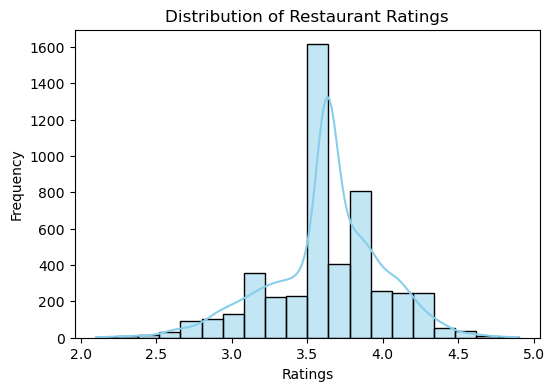

In [29]:
# Visualize distribution of ratings
plt.figure(figsize=(6,4))
sns.histplot(df["rate"], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

#Business Insights 
# Most ratings are between 3.5 and 4.5, suggesting customers generally give positive feedback.
# The slight left-skew means a few restaurants have lower ratings, but the majority perform well

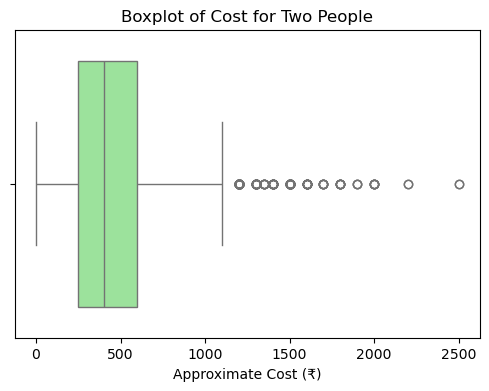

In [30]:
# Visualize cost for two
plt.figure(figsize=(6,4))
sns.boxplot(x=df["approx_cost(for two people)"], color='lightgreen')
plt.title("Boxplot of Cost for Two People")
plt.xlabel("Approximate Cost (₹)")
plt.show()

# Business Insights 
# The median cost is around ₹400–₹500, but a few restaurants have prices up to ₹2500+, causing a right-skew and clear outliers.
# This means most restaurants are budget to mid-range, with only a few being premium or luxury dining.

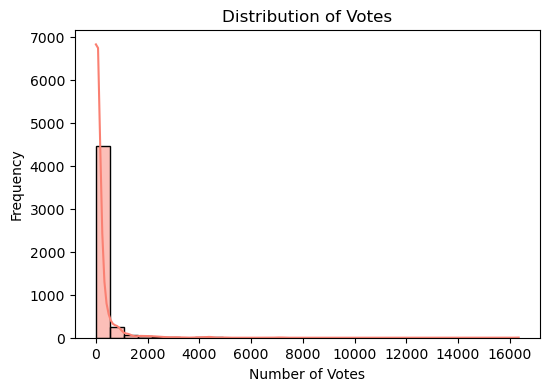

In [31]:
# Step 4: Distribution of votes
plt.figure(figsize=(6,4))
sns.histplot(df["votes"], bins=30, kde=True, color='salmon')
plt.title("Distribution of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.show()

# Business Insights
# The majority of restaurants have fewer than 100 votes, but a few highly popular ones have thousands, 
#creating a long right tail (positive skew).
# This indicates popularity imbalance — only a small percentage of restaurants dominate customer engagement.

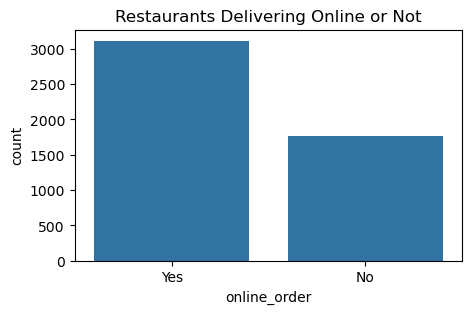

online_order
Yes    63.90484
No     36.09516
Name: proportion, dtype: float64


In [33]:
# Online Order Analysis
plt.figure(figsize=(5,3))
sns.countplot(x="online_order", data=df)
plt.title("Restaurants Delivering Online or Not")
plt.show()

#The majority of restaurants are offering online delivery services, 
#suggesting that online platforms are now a core part of restaurant operations. 
#Businesses that still don't deliver online may be missing out on a large portion of the digital customer base

# Calculate percentage distribution
online_order_prop = df["online_order"].value_counts(normalize=True) * 100
print(online_order_prop)
# Business Insights
# About 64% of restaurants accept online orders, while 36% do not.
# This indicates that online food delivery is widely adopted in Bengaluru, reflecting the strong growth of food delivery platforms.


rest_type
Quick Bites                   40.299426
Casual Dining                 21.410993
Cafe                           6.685808
Dessert Parlor                 5.147662
Delivery                       4.737490
                                ...    
Food Court, Casual Dining      0.020509
Food Court, Dessert Parlor     0.020509
Bakery, Food Court             0.020509
Club                           0.020509
Sweet Shop, Dessert Parlor     0.020509
Name: proportion, Length: 62, dtype: float64

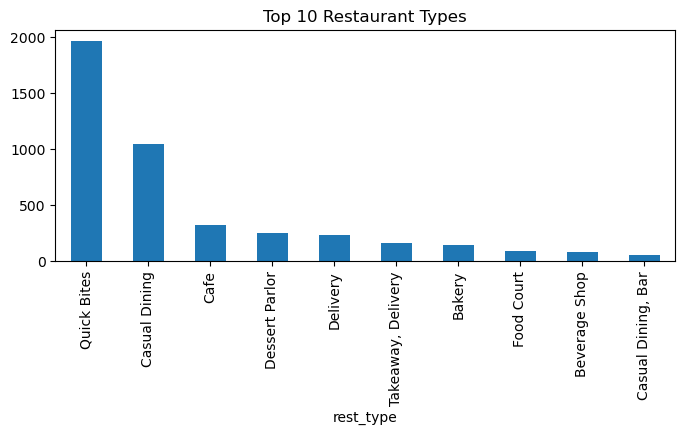

In [34]:
# Restaurant Type
plt.figure(figsize=(8,3))
df["rest_type"].value_counts()[:10].plot(kind="bar")
plt.title("Top 10 Restaurant Types")

# Calculate percentage distribution
df["rest_type"].value_counts(normalize = True) * 100

# Business Insights
# The majority of restaurants in Bengaluru fall under Quick Bites (≈40%) and Casual Dining (≈21%), 
#while the rest such as Cafés, Bakeries, 
#and Dessert Parlors collectively make up around 4–6% each.
# This indicates that customers in Bengaluru prefer quick, affordable, and convenient dining experiences.
# From a business point of view, this suggests a strong opportunity to:
# Focus on Quick Bite outlets and Casual Dining setups
# Offer combo deals, loyalty programs, and quick-service promotions to attract this customer base

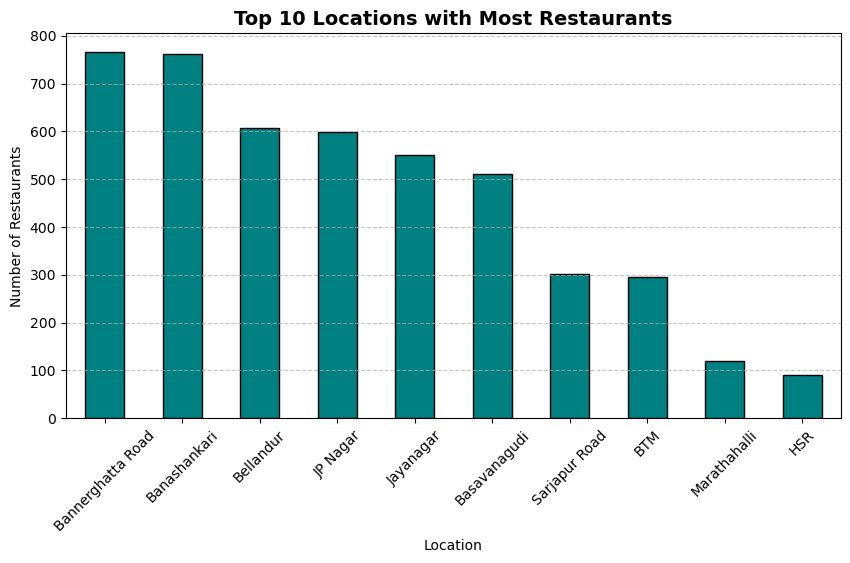

location
Bannerghatta Road    15.730107
Banashankari         15.648072
Bellandur            12.448728
JP Nagar             12.264151
Jayanagar            11.279737
Basavanagudi         10.479902
Sarjapur Road         6.173093
BTM                   6.050041
Marathahalli          2.440525
HSR                   1.866284
Name: proportion, dtype: float64


In [35]:
# Top 10 Locations with Most Restaurants
plt.figure(figsize=(10,5))
df["location"].value_counts()[:10].plot(kind="bar", color='teal', edgecolor='black')
plt.title("Top 10 Locations with Most Restaurants", fontsize=14, fontweight='bold')
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Percentage distribution
location_percent = df["location"].value_counts(normalize=True) * 100
print(location_percent.head(10))


#Business insights

# The top locations with the highest number of restaurants in Bengaluru are:
# Bannerghatta Road (15.7%)
# Banashankari (15.6%)
# Bellandur (12.4%)
# JP Nagar (12.2%)
# Jayanagar (11.2%)
# These are prime food hubs in the city, with a high concentration of restaurants due to dense residential and office areas.
# New restaurant ventures might face tough competition in these areas but also high footfall.
# Emerging areas like Marathahalli, HSR, and BTM show moderate restaurant counts, 
# which could be potential growth zones — less crowded yet popular with young professionals.

# Advanced EDA (Bivariate + Multivariate)

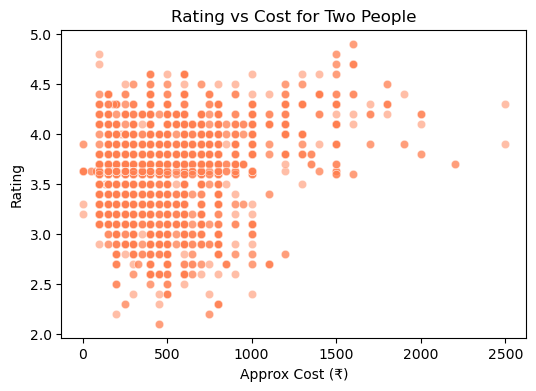

np.float64(0.2432784050807419)

In [37]:
# Analysis: Rating vs Cost for Two People

plt.figure(figsize=(6,4))
sns.scatterplot(x="approx_cost(for two people)", y="rate", data=df, alpha=0.5, color='coral')
plt.title("Rating vs Cost for Two People")
plt.xlabel("Approx Cost (₹)")
plt.ylabel("Rating")
plt.show()

df["approx_cost(for two people)"].corr(df["rate"])

#Correlation: 0.2433

# Insights:

# Most restaurants are moderately priced between ₹500–₹1000, and their ratings are clustered between 3.5–4.5.
# This indicates that customers prefer moderately priced places.
# The correlation (0.24) is weakly positive — showing that as price increases, ratings slightly increase, 
# but the relationship isn’t strong.
# A few high-cost restaurants exist, but they don’t necessarily have higher ratings.
# Overall, restaurant pricing doesn’t heavily influence ratings — other factors like food quality, 
# service, or ambience might play a bigger role.

C:\Users\user\AppData\Local\Temp\ipykernel_17760\1312121877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="online_order", y="rate", data=df, palette="Set2")


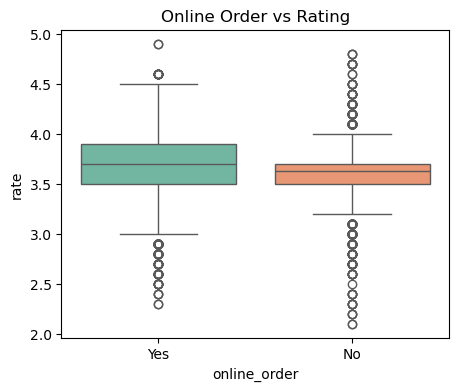

In [38]:
# Analysis: Online Order vs Rating

plt.figure(figsize=(5,4))
sns.boxplot(x="online_order", y="rate", data=df, palette="Set2")
plt.title("Online Order vs Rating")
plt.show()

# Insights:
# Restaurants that offer online ordering tend to have higher and more consistent customer ratings compared to those that don’t.
# The median rating is clearly higher for restaurants with online ordering available.
# This suggests that the convenience and accessibility of online ordering may positively 
# influence customer satisfaction and perception, leading to better ratings.
# Restaurants without online ordering show wider variability in ratings, indicating less consistent customer experience.

C:\Users\user\AppData\Local\Temp\ipykernel_17760\460560670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rest_type", y="approx_cost(for two people)", data=df[df["rest_type"].isin(top_types)], palette="Set3")


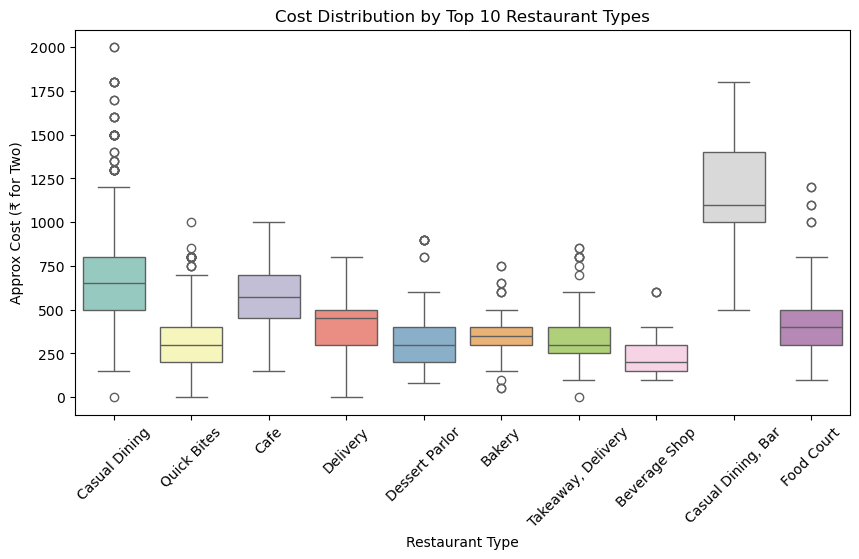

In [39]:
# Cost Distribution by Restaurant Type
plt.figure(figsize=(10,5))
top_types = df["rest_type"].value_counts().index[:10]
sns.boxplot(x="rest_type", y="approx_cost(for two people)", data=df[df["rest_type"].isin(top_types)], palette="Set3")
plt.xticks(rotation=45)
plt.title("Cost Distribution by Top 10 Restaurant Types")
plt.ylabel("Approx Cost (₹ for Two)")
plt.xlabel("Restaurant Type")
plt.show()

#Insights
# Fine Dining and Pubs attract premium customers — smaller volume but high spending.
# Quick Bites and Cafés dominate everyday eating trends — larger customer volume, lower price.
# For a new restaurant, targeting Casual Dining or Quick Bites could balance affordability and profitability.

## Step 6 : Analytical EDA (Question-Based Analysis)

Objective:
To extract actionable business insights by answering
specific analytical questions based on customer behavior,
restaurant performance, and location trends.

In [40]:
# Average rating for each restaurant type
avg_rating = df.groupby("rest_type")["rate"].mean().sort_values(ascending=False)
print("Average Rating by Restaurant Type:\n", avg_rating.head(10))

#Insight 
# Microbreweries lead with an average rating of 4.6, followed by Microbrewery & Pub and Dessert Café.
# Premium, experience-driven formats deliver the highest customer satisfaction.

Average Rating by Restaurant Type:
 rest_type
Microbrewery                   4.600000
Microbrewery, Pub              4.333333
Dessert Parlor, Cafe           4.300000
Casual Dining, Cafe            4.252381
Club                           4.200000
Casual Dining, Microbrewery    4.200000
Bar, Casual Dining             4.145044
Casual Dining, Pub             4.122222
Pub, Casual Dining             4.112500
Casual Dining, Bar             4.052022
Name: rate, dtype: float64


In [42]:
#  Top 10 locations with the highest average votes

top_10_location_votes = df.groupby("location")["votes"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Locations by Average Votes:\n", top_10_location_votes)

# Marathahalli, Sarjapur Road, and Jayanagar receive the most customer engagement (votes).
#  These are prime dining hubs with strong digital and footfall visibility.


Top 10 Locations by Average Votes:
 location
Marathahalli             424.033613
Sarjapur Road            390.538206
Rajarajeshwari Nagar     366.000000
Jayanagar                325.787273
Koramangala 1st Block    323.333333
Old Airport Road         299.500000
HSR                      257.780220
JP Nagar                 245.884615
Koramangala 5th Block    238.000000
Indiranagar              237.000000
Name: votes, dtype: float64


In [43]:
#  Average cost for two for each cuisine

avg_cost = df.groupby("cuisines")["approx_cost(for two people)"].mean().sort_values(ascending=False)
print("\nAverage Cost for Two by Cuisine:\n", avg_cost.head(10))

# Multi-cuisine and Continental options are the most expensive (₹1800–₹2500), while Street Food and South Indian are budget-friendly.
#  Clear market segmentation between premium and casual dining.


Average Cost for Two by Cuisine:
 cuisines
continental, north indian, japanese, italian                                        2500.0
european, french, north indian                                                      2500.0
continental, thai, malaysian, burmese, korean, vietnamese, chinese, north indian    2000.0
finger food, north indian                                                           2000.0
asian, north indian, south indian, momos                                            2000.0
spanish, italian, mediterranean                                                     2000.0
continental, italian, north indian, mexican                                         1900.0
continental, thai, vietnamese, american, chinese, north indian, finger food         1900.0
japanese, north indian, italian, korean, mexican, thai                              1800.0
american, tex-mex, burger, bbq                                                      1800.0
Name: approx_cost(for two people), dtype: floa

In [44]:
# Number of restaurants offering online ordering in each location

no_of_rest_online = df[df['online_order'] == "Yes"].groupby("location")['online_order'].count().sort_values(ascending=False)
print("\nNumber of Restaurants Offering Online Orders by Location:\n", no_of_rest_online.head(10))

# Bannerghatta Road, Banashankari, and JP Nagar dominate online delivery availability.
#  Delivery apps are highly adopted in these localities.


Number of Restaurants Offering Online Orders by Location:
 location
Bannerghatta Road    425
Banashankari         404
JP Nagar             394
Jayanagar            392
Bellandur            348
Basavanagudi         315
BTM                  246
Sarjapur Road        226
Marathahalli          95
HSR                   87
Name: online_order, dtype: int64


In [45]:
# Average rating by location + identify top-rated area
avg_rating_loc = df.groupby("location")["rate"].mean().sort_values(ascending=False)
top_location = avg_rating_loc.idxmax()
top_rating = avg_rating_loc.max()
print(f"\n🏆 Highest Rated Area: {top_location} with an Average Rating of {round(top_rating, 2)}")

# Old Airport Road has the highest overall customer satisfaction with an average rating of 4.05.
#  Consistent service quality and diverse restaurant options.


🏆 Highest Rated Area: Old Airport Road with an Average Rating of 4.05


In [47]:
# ️Which restaurant type receives the most votes on average?

avg_votes_rest = df.groupby("rest_type")["votes"].mean().sort_values(ascending=False)
top_rest_type = avg_votes_rest.idxmax()
top_avg_votes = avg_votes_rest.max()

print("Average votes by restaurant type:")
print(avg_votes_rest.head(10))
print(f" {top_rest_type} restaurants receive the highest average votes: {round(top_avg_votes, 2)}")

# Microbreweries again lead with 9K+ average votes, far above other formats.
#  High engagement and strong community preference.

Average votes by restaurant type:
rest_type
Microbrewery                   9124.600000
Microbrewery, Pub              5704.000000
Casual Dining, Microbrewery    3227.000000
Casual Dining, Cafe            1703.952381
Casual Dining, Bar             1381.890909
Pub, Bar                       1010.000000
Casual Dining, Pub              955.222222
Pub                             937.500000
Pub, Casual Dining              910.125000
Microbrewery, Casual Dining     769.909091
Name: votes, dtype: float64
 Microbrewery restaurants receive the highest average votes: 9124.6


In [48]:
# Among restaurants that offer online orders, which cuisine has the highest average rating?

online_rest = df[df['online_order'] == 'Yes']
avg_rating_cuisine = online_rest.groupby('cuisines')['rate'].mean().sort_values(ascending=False)
top_cuisine = avg_rating_cuisine.idxmax()
top_cuisine_rating = avg_rating_cuisine.max()

print("Top cuisines (online order only):")
print(avg_rating_cuisine.head(10))
print(f"Highest Rated Cuisine (Online Orders): {top_cuisine} — {round(top_cuisine_rating, 2)}")

# Online Orders vs Cuisine Preference
# Among online-ordering restaurants, Continental, North Indian, Italian, South Indian, 
# and Finger Food cuisines score the highest (avg. 4.9).
#  Diverse menus attract top online ratings.

Top cuisines (online order only):
cuisines
continental, north indian, italian, south indian, finger food           4.90
african, burger                                                         4.60
american, north indian, chinese, finger food                            4.60
pizza, cafe, italian                                                    4.52
beverages, sandwich                                                     4.50
biryani, andhra, north indian, seafood                                  4.50
american, tex-mex, burger, bbq                                          4.50
continental, mexican, chinese, north indian                             4.50
healthy food, north indian, biryani, continental, sandwich, desserts    4.48
north indian, italian                                                   4.40
Name: rate, dtype: float64
Highest Rated Cuisine (Online Orders): continental, north indian, italian, south indian, finger food — 4.9


In [49]:
# Top 5 locations with the highest average cost for two (only for restaurants with rating ≥ 4.0)

high_rated = df[df['rate'] >= 4.0]
avg_cost_by_location = high_rated.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False)

print("Top 5 costly locations (for highly rated restaurants):")
print(avg_cost_by_location.head(5))

# High-Rated Premium Clusters
# Restaurants rated 4.0+ and located in Marathahalli, Richmond Road, and Sarjapur Road show the highest average cost for two.
# Premium pricing aligns with top-rated dining experiences.

Top 5 costly locations (for highly rated restaurants):
location
Marathahalli     1114.285714
Richmond Road     950.000000
Sarjapur Road     940.909091
Shanti Nagar      900.000000
Bellandur         831.250000
Name: approx_cost(for two people), dtype: float64


In [50]:
# Which restaurant type has the largest price variation (difference between max & min cost)?

price_variation = df.groupby('rest_type')['approx_cost(for two people)'].agg(['min', 'max'])
price_variation['price_diff'] = price_variation['max'] - price_variation['min']
top_var_rest = price_variation['price_diff'].idxmax()
top_var_value = price_variation['price_diff'].max()

print(f"'{top_var_rest}' has the largest price variation — ₹{round(top_var_value)} difference between cheapest & most expensive restaurant.")

# Price Variation by Restaurant Type
# Bars show the largest price gap (~₹2200), reflecting diversity from budget pubs to luxury lounges.
# Compare the average rating of restaurants that offer table booking vs those that don’t.

'Bar' has the largest price variation — ₹2200 difference between cheapest & most expensive restaurant.


In [52]:
# Average Rating by Table Booking Availability:

table_rating = df.groupby('book_table')['rate'].mean()
print("Average Rating by Table Booking Availability:")
print(table_rating)

if table_rating['Yes'] > table_rating['No']:
    print("Restaurants with Table Booking tend to have higher ratings.")
else:
    print(" Restaurants without Table Booking have slightly better ratings.")
    
# Table Booking vs Ratings
# Restaurants with table booking have higher average ratings (4.04 vs 3.59).
#  Structured service enhances customer experience.

Average Rating by Table Booking Availability:
book_table
No     3.594306
Yes    4.047132
Name: rate, dtype: float64
Restaurants with Table Booking tend to have higher ratings.


# Conclusion :

The Zomato Bengaluru dataset reveals clear patterns in the city’s dining behavior and market segmentation.

Customer Preferences: Quick Bites (≈40%) and Casual Dining (≈21%) dominate the restaurant landscape. This shows that most people in Bengaluru prefer fast, affordable, and convenient dining experiences over premium or fine-dine options.

Ratings & Satisfaction: Microbreweries and premium formats like Dessert Cafés consistently receive the highest ratings (avg. 4.6+), proving that experience-based and ambiance-driven dining retains strong customer loyalty.

Pricing Trends: The cost distribution is positively skewed, with most restaurants priced between ₹400–₹800 for two. A few luxury outlets (₹2000+) pull the mean upward. Interestingly, price and rating show only a weak correlation, suggesting that higher prices don’t guarantee better satisfaction.

Location Insights: Areas such as Marathahalli, Sarjapur Road, and Jayanagar have the highest engagement (votes) and strong online presence — marking them as key business zones for restaurant growth.

Online Ordering Behavior: Bannerghatta Road, JP Nagar, and Banashankari show high online delivery adoption. Restaurants offering online ordering generally have better ratings, highlighting that convenience strongly influences satisfaction.

Service Quality: Restaurants with table booking features tend to perform better (4.04 vs 3.59), showing how structured service boosts user trust and experience.

# Market Opportunity:
a. Focus marketing and expansion on Quick Bites and Casual Dining outlets.

b. Enhance online delivery services in high-demand areas.

c. Use combo offers, loyalty programs, and experience-based branding to maximize engagement.

Overall, the Bengaluru restaurant market thrives on convenience, affordability, and digital accessibility. 
Businesses that align their strategy with these consumer patterns can drive higher ratings, engagement, and long-term growth.
